In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
import os

In [6]:
def imshow(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [7]:
def get_lane_mask(sample,lane_idx):
    points_lane = []
    h_max = np.max(data['h_samples'][sample])
    h_min = np.min(data['h_samples'][sample])
    x_idx = data['lanes'][sample][lane_idx]
    y_idx = data['h_samples'][sample]
    for x,y in zip(x_idx,y_idx):
        offset = (y-h_min)/20
    #     print(offset)
        if x>-100:
            points_lane.append([x-offset/2,y])
    x_idx_=x_idx.copy()
    y_idx_=y_idx.copy()
    x_idx_.reverse()
    y_idx_.reverse()
    for x,y in zip(x_idx_,y_idx_):
        offset = (y-h_min)/20
    #     print(offset)
        if x>-100:
            points_lane.append([x+offset/2,y])
    return points_lane

In [8]:
def create_lane_mask(img_raw,sample):
    colors = [[255,0,0],[0,255,0],[0,0,255],[0,255,255]]
    laneMask = np.zeros(img_raw.shape, dtype=np.uint8)
    for lane_idx in range(len(data.lanes[sample])):
        points_lane = get_lane_mask(sample,lane_idx)
        if len(points_lane)>0: 
            pts = np.array(points_lane, np.int32)
            pts = pts.reshape((-1,1,2))
            laneMask = cv2.fillPoly(laneMask,[pts],colors[lane_idx])
            colors = [[255,0,0],[0,255,0],[0,0,255],[0,255,255]]
            # create grey-scale label image
            label = np.zeros((720,1280),dtype = np.uint8)
            for i in range(len(colors)):
               label[np.where((laneMask == colors[i]).all(axis = 2))] = i+1
        else: continue
    return(img_raw, label)

In [9]:
data = pd.read_json(os.path.join(data_dir, 'label_data.json'), lines=True)
data.info()
print(len(data.raw_file))
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2858 entries, 0 to 2857
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   lanes      2858 non-null   object
 1   h_samples  2858 non-null   object
 2   raw_file   2858 non-null   object
dtypes: object(3)
memory usage: 67.1+ KB
2858


,lanes,h_samples,raw_file
0,"[[-100, -100, -100, -100, 632, 625, 617, 609, ...","[240, 250, 260, 270, 280, 290, 300, 310, 320, ...",clips/0313-1/6040/20.jpg
1,"[[-100, -100, -100, 658, 646, 635, 623, 612, 6...","[240, 250, 260, 270, 280, 290, 300, 310, 320, ...",clips/0313-1/5320/20.jpg
2,"[[-100, 570, 554, 538, 522, 505, 489, 473, 456...","[240, 250, 260, 270, 280, 290, 300, 310, 320, ...",clips/0313-1/23700/20.jpg
3,"[[-100, -100, -100, -100, 555, 542, 530, 517, ...","[240, 250, 260, 270, 280, 290, 300, 310, 320, ...",clips/0313-1/51660/20.jpg
4,"[[-100, -100, -100, 522, 525, 528, 531, 534, 5...","[240, 250, 260, 270, 280, 290, 300, 310, 320, ...",clips/0313-1/25680/20.jpg
...,...,...,...
2853,"[[-100, -100, -100, 595, 589, 583, 577, 571, 5...","[240, 250, 260, 270, 280, 290, 300, 310, 320, ...",clips/0313-2/26520/20.jpg
2854,"[[-100, -100, 728, 683, 651, 624, 608, 592, 57...","[240, 250, 260, 270, 280, 290, 300, 310, 320, ...",clips/0313-2/30960/20.jpg
2855,"[[417, 435, 453, 471, 477, 478, 480, 481, 482,...","[240, 250, 260, 270, 280, 290, 300, 310, 320, ...",clips/0313-2/23220/20.jpg
2856,"[[-100, -100, -100, -100, 440, 451, 458, 458, ...","[240, 250, 260, 270, 280, 290, 300, 310, 320, ...",clips/0313-2/35300/20.jpg


In [10]:
print(len(data.raw_file))

2858


In [11]:
for i in range(len(data.raw_file)):
    img_path = data.raw_file[i]
    img_path = os.path.join(data_dir,img_path)
    print('Reading from: ', img_path)
    path_list = img_path.split('/')[:-1]
    mask_path_dir = os.path.join(*path_list)

    img_raw = cv2.imread(img_path)
    img_, mask = create_lane_mask(img_raw,i)
    """
    fig = plt.figure(figsize=(15,20))
    plt.subplot(211)
    imshow(img_raw)
    plt.subplot(212)
    print(mask.shape)
    plt.imshow(mask)
    """
    mask_path_dir = mask_path_dir.replace('clips', 'masks')
    print('Saving to: ', mask_path_dir)
    try:
        os.makedirs(mask_path_dir)
    except:
        pass

    for i in range(1, 21):
        cv2.imwrite(os.path.join( mask_path_dir, f'{i}.tiff'), mask)
    # i = i+1


Reading from:  dataset/clips/0313-1/6040/20.jpg
Saving to:  dataset/masks/0313-1/6040
Reading from:  dataset/clips/0313-1/5320/20.jpg
Saving to:  dataset/masks/0313-1/5320
Reading from:  dataset/clips/0313-1/23700/20.jpg
Saving to:  dataset/masks/0313-1/23700
Reading from:  dataset/clips/0313-1/51660/20.jpg
Saving to:  dataset/masks/0313-1/51660
Reading from:  dataset/clips/0313-1/25680/20.jpg
Saving to:  dataset/masks/0313-1/25680
Reading from:  dataset/clips/0313-1/36000/20.jpg
Saving to:  dataset/masks/0313-1/36000
Reading from:  dataset/clips/0313-1/9460/20.jpg
Saving to:  dataset/masks/0313-1/9460
Reading from:  dataset/clips/0313-1/6180/20.jpg
Saving to:  dataset/masks/0313-1/6180
Reading from:  dataset/clips/0313-1/10100/20.jpg
Saving to:  dataset/masks/0313-1/10100
Reading from:  dataset/clips/0313-1/39720/20.jpg
Saving to:  dataset/masks/0313-1/39720
Reading from:  dataset/clips/0313-1/7780/20.jpg
Saving to:  dataset/masks/0313-1/7780
Reading from:  dataset/clips/0313-1/31680/

In [67]:
cv2.imwrite('/Users/srinivas/Projects/Lane_Detection/datasets/LaneDetection/train/masks/0313-1/300/1.tiff', mask)

True

In [68]:
mask_img = cv2.imread('20.tiff', cv2.IMREAD_GRAYSCALE)
mask_img.shape

(720, 1280)

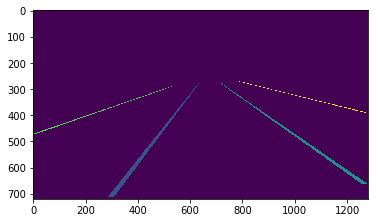

In [69]:
plt.imshow(mask_img)

In [70]:
print(np.unique(mask_img))
print(np.unique(mask))

[0 1 2 3 4]
[0 1 2 3 4]
